In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/home/efarr/Documents/GitHub/metalinks/Tests/Figures')
from aux import *
import matplotlib.gridspec as gridspec

In [17]:
DB = pd.read_csv('/home/efarr/Documents/BC/TestDBs/DB_F.csv')
DB['connection'] = DB['HMDB'] + '_' + DB['Symbol']
len(DB['connection'].unique())

10165

In [18]:
metalinks_data = load_prepro_metalinks(MR_path='/home/efarr/Documents/BC/TestDBs/DB_F.csv')
PD = metalinks_data[0]
MR = metalinks_data[1]
anno = metalinks_data[2]
data = load_prepro_other_dbs(MR, PD)
PD_metabolites = data[0]
MR_metabolites = data[1]
MR_proteins = data[2]
MR_interactions = data[3]

In [19]:
# BARPLOT
NeuronChatDB = [len(MR_interactions[0]), len(MR_metabolites[0]), len(MR_proteins[0])]
CellPhoneDB = [len(MR_interactions[1]), len(MR_metabolites[1]), len(MR_proteins[1])]
MebocostDB = [len(MR_interactions[2]), len(MR_metabolites[2]), len(MR_proteins[2])]
MetalinksDB = [len(MR_interactions[3]), len(MR_metabolites[3]), len(MR_proteins[3])]

# write the above as function that takes a list of lists as input
df = preprocess_data_for_barplot([NeuronChatDB, CellPhoneDB, MebocostDB, MetalinksDB], ['NCDB', 'CPDB', 'MDB', 'MLDB'], ['Interactions', 'Metabolites', 'Proteins'])
# HEATMAP

matrix = prepare_fractions(MR_metabolites, anno)

hm1 = prepro_hm(matrix[0])
hm2 = prepro_hm(matrix[1])
hm3 = prepro_hm(matrix[3])

/home/efarr/Documents/metalinks/Tests/Figures/aux.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fractions = fractions.append(others)
/home/efarr/Documents/metalinks/Tests/Figures/aux.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fractions = fractions.append(others)
/home/efarr/Documents/metalinks/Tests/Figures/aux.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fractions = fractions.append(others)
/home/efarr/Documents/metalinks/Tests/Figures/aux.py:139: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fractions = fractions.append(others)


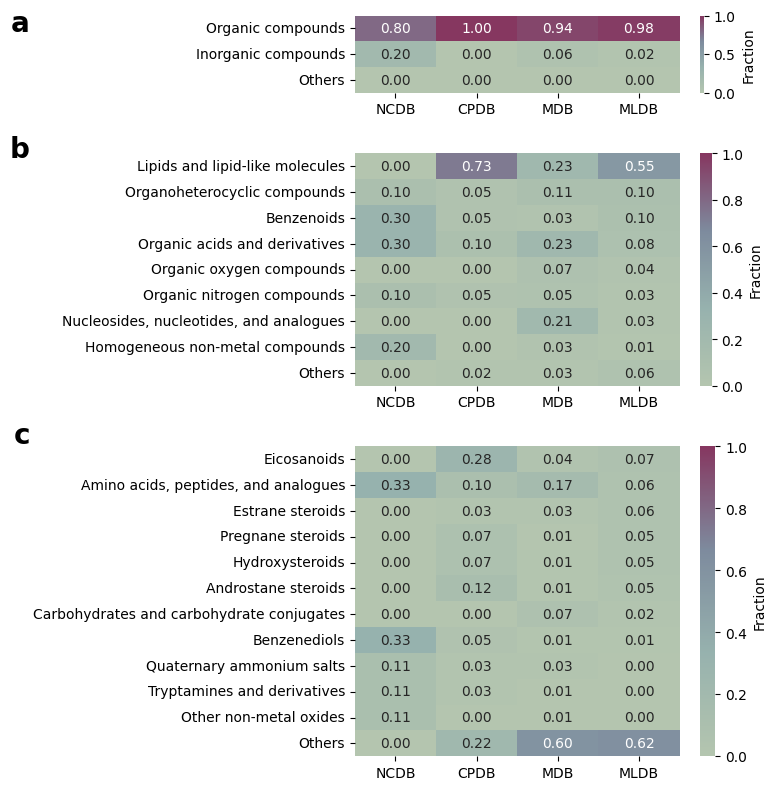

In [20]:
def figure_s3(hm1, hm2, hm3):

    fig = plt.figure(figsize=(12, 8))
    # give different height weights to the subplots
    gs = gridspec.GridSpec(3, 1, height_ratios=[3, 9, 12])

    colors = ['#B2C9AB', '#92B6B1', '#788AA3', '#932A61']
    color_list = ['#B2C9AB', '#92B6B1', '#788AA3', '#932A61']
    color_list_r = ['#932A61','#788AA3', '#92B6B1', '#B2C9AB']
    adjusted_colors = [sns.desaturate(c, 0.75) for c in color_list]
    cmap_custom = mcolors.LinearSegmentedColormap.from_list('custom_cmap', adjusted_colors)


    colormap = 'cividis'
    colormap = cmap_custom
    ax1 = plt.subplot(gs[0])
    sns.heatmap(hm1, annot=True, cmap=colormap, fmt='.2f', vmin=0, vmax=1, ax=ax1 )
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
    cbar = ax1.collections[0].colorbar
    cbar.set_label('Fraction')

    ax2 = plt.subplot(gs[1])
    sns.heatmap(hm2, annot=True, cmap=colormap, fmt='.2f', vmin=0, vmax=1, ax=ax2 )
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    cbar = ax2.collections[0].colorbar
    cbar.set_label('Fraction')

    ax3 = plt.subplot(gs[2])
    sns.heatmap(hm3, annot=True, cmap=colormap, fmt='.2f', vmin=0, vmax=1, ax=ax3 )
    ax3.set_xticklabels(ax2.get_xticklabels(), rotation=0)
    cbar = ax3.collections[0].colorbar
    cbar.set_label('Fraction')



    ax1.text(-1.00, 1.08, 'a', transform=ax1.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    ax2.text(-1.00, 1.08, 'b', transform=ax2.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')
    ax3.text(-1.00, 1.08, 'c', transform=ax3.transAxes, fontsize=20, fontweight='bold', va='top', ha='right')


    plt.tight_layout()
    plt.show()

figure_s3(hm1, hm2, hm3)
